# Trader Performance vs Market Sentiment

### Objective

Analyze how **market sentiment (Fear/Greed)** relates to **trader behavior and performance** on Hyperliquid. Your goal is to uncover patterns that could inform smarter trading strategies.


### Understanding Dataset

``(fear_greed_index.csv)`` Tracks the daily sentiment of the crypto market.


| Column | Description |
|---|---|
| timestamp | Unix epoch timestamp corresponding to the data point |
| value | numerical score (0-100) representing market sentiment |
| classification | categorical label of the sentiment ("Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed") |
| date |  calendar date (YYYY-MM-DD) |




``(historical_data.csv)`` Contains trade-level execution details from Hyperliquid.


| Column | Description |
|---|---|
| Account | 42 character hexadecimal string, representing unique account id/wallet ID of trader |
| Coin | Symbol or ticker of the asset being traded (e.g., AAVE, @107) |
| Execution Price | Specific price at which the trade was filled |
| Size Tokens |  Number of tokens bought or sold in the transaction |
| Size USD |  Notional value of the trade in USD (Execution Price × Size Tokens) |
| Side | Indicates whether the trade was a BUY or SELL order |
| Timestamp IST | Human-readable date and time of the trade in Indian Standard Time |
| Start Position | Size of the trader's open position before this specific trade |
| Direction | Context on the trade's effect (e.g., Open Long, Close Long) |
| Closed PnL | Realized Profit and Loss if this trade closed a position (0 if opening) |
| Transaction Hash | Unique hash string identifying the transaction on the ledger |
| Order ID |  Unique system identifier for the order submitted by the user |
| Crossed | Boolean indicating if the order was a Taker (crossed the spread) |
| Fee | Transaction fee paid by the trader for this execution |
| Trade ID | Unique identifier for the specific individual trade match |
| Timestamp | Precise time of the trade execution (Unix timestamp) |


### Part A — Data preparation

1. Load both datasets and document

In [909]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)

In [836]:
df_sentiment = pd.read_csv("data/fear_greed_index.csv")
df_trades = pd.read_csv("data/historical_data.csv")


In [837]:
df_sentiment

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [838]:
df_trades

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,986.87,7872.16,BUY,02-12-2024 22:50,0.00,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.35,895000000000000.00,1730000000000.00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.00,127.68,BUY,02-12-2024 22:50,986.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.01,443000000000000.00,1730000000000.00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,144.09,1150.63,BUY,02-12-2024 22:50,1002.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,660000000000000.00,1730000000000.00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,142.98,1142.04,BUY,02-12-2024 22:50,1146.56,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,1080000000000000.00,1730000000000.00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,8.73,69.75,BUY,02-12-2024 22:50,1289.49,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.00,1050000000000000.00,1730000000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.10,382.20,420.80,SELL,25-04-2025 15:35,7546.60,Close Long,-20.26,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.04,199000000000000.00,1750000000000.00
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.10,2124.10,2338.63,SELL,25-04-2025 15:35,7164.40,Close Long,-112.58,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.23,926000000000000.00,1750000000000.00
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.10,423.40,466.16,SELL,25-04-2025 15:35,5040.30,Close Long,-22.44,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.05,693000000000000.00,1750000000000.00
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.10,3599.80,3963.38,SELL,25-04-2025 15:35,4616.90,Close Long,-190.79,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.40,418000000000000.00,1750000000000.00


In [839]:
# Check number of columns/rows
df_sentiment.info()

<class 'pandas.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   timestamp       2644 non-null   int64
 1   value           2644 non-null   int64
 2   classification  2644 non-null   str  
 3   date            2644 non-null   str  
dtypes: int64(2), str(2)
memory usage: 82.8 KB


In [840]:
# Missing values / column
print(f"Missing Values:\n{df_sentiment.isnull().sum()}")

Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [841]:
# Number of duplicate rows
print(f"\nDuplicates: {df_sentiment.duplicated().sum()}")


Duplicates: 0


In [842]:
# Number of columns/rows
df_trades.info()

<class 'pandas.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  str    
 1   Coin              211224 non-null  str    
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  str    
 6   Timestamp IST     211224 non-null  str    
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  str    
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  str    
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(8), int64(1

In [843]:
# Number of duplicate rows
print(f"\nDuplicates: {df_trades.duplicated().sum()}")


Duplicates: 0


In [844]:
# Missing values / column
print(f"Missing Values:\n{df_trades.isnull().sum()}")

Missing Values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


Conclusion: There are no duplicates and missing values in both datasets

2. Convert timestamps and align the datasets by date (daily level is fine).

In [845]:
# Checking initial dtypes
df_sentiment.info()

<class 'pandas.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   timestamp       2644 non-null   int64
 1   value           2644 non-null   int64
 2   classification  2644 non-null   str  
 3   date            2644 non-null   str  
dtypes: int64(2), str(2)
memory usage: 82.8 KB


In [846]:
# We can remove timestamp column (not required as we already have date column)
df_sentiment = df_sentiment.drop(columns=["timestamp"])

In [847]:
# Converting date string to object
df_sentiment["date"] = pd.to_datetime(df_sentiment["date"])

In [848]:
df_sentiment.info()

<class 'pandas.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   value           2644 non-null   int64         
 1   classification  2644 non-null   str           
 2   date            2644 non-null   datetime64[us]
dtypes: datetime64[us](1), int64(1), str(1)
memory usage: 62.1 KB


In [849]:
# Checking initial dtypes
df_trades.info()

<class 'pandas.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  str    
 1   Coin              211224 non-null  str    
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  str    
 6   Timestamp IST     211224 non-null  str    
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  str    
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  str    
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(8), int64(1

Note: Cannot use ``Timestamp`` column because the values are rounded to scientific notation (e.g., ``1.73E+12``), Therefore, millisecond precision has been lost. Converting this specific value results in 2024-10-27, which differs from Timestamp IST column (02-12-2024 22:50).

In [850]:
# Demonstrating the above note
pd.DataFrame({
    "Date from Timestamp" : pd.to_datetime(df_trades['Timestamp'], unit='ms').apply(lambda item: item.date()),
    "Date from Timestamp IST": df_trades["Timestamp IST"]

})

,Date from Timestamp,Date from Timestamp IST
0,2024-10-27,02-12-2024 22:50
1,2024-10-27,02-12-2024 22:50
2,2024-10-27,02-12-2024 22:50
3,2024-10-27,02-12-2024 22:50
4,2024-10-27,02-12-2024 22:50
...,...,...
211219,2025-06-15,25-04-2025 15:35
211220,2025-06-15,25-04-2025 15:35
211221,2025-06-15,25-04-2025 15:35
211222,2025-06-15,25-04-2025 15:35


In [851]:
# Removing Timestamp column as it is corrupted
df_trades = df_trades.drop(columns=["Timestamp"])

In [852]:
# Extracting date values from Timestamp IST
df_trades_date = df_trades["Timestamp IST"].str.split(" ").str[0]
df_trades_date

0         02-12-2024
1         02-12-2024
2         02-12-2024
3         02-12-2024
4         02-12-2024
             ...    
211219    25-04-2025
211220    25-04-2025
211221    25-04-2025
211222    25-04-2025
211223    25-04-2025
Name: Timestamp IST, Length: 211224, dtype: object

In [853]:
# Converting date to datetime for vectorized operations + sorting
df_trades["date"] = pd.to_datetime(df_trades_date, format="%d-%m-%Y")

In [854]:
# Removing redundant column
df_trades = df_trades.drop(columns=["Timestamp IST"])

In [855]:
df_trades.info()

<class 'pandas.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  str           
 1   Coin              211224 non-null  str           
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  str           
 6   Start Position    211224 non-null  float64       
 7   Direction         211224 non-null  str           
 8   Closed PnL        211224 non-null  float64       
 9   Transaction Hash  211224 non-null  str           
 10  Order ID          211224 non-null  int64         
 11  Crossed           211224 non-null  bool          
 12  Fee               211224 non-null  float64       
 13  Trade ID          211224 non-null  float64       
 14  date           

3. Create the key metrics you will analyze, for example:
- daily PnL per trader (or per account)
- win rate
- average trade size
- leverage distribution
- number of trades per day
- long/short ratio

Let's merge the two data sets on date column to combine sentinment data with trade records data

In [856]:
df_merged = df_trades.merge(df_sentiment, how='left', on='date')

In [857]:
# Normalizing column names
df_merged.columns = df_merged.columns.str.lower().str.replace(" ", "_")

In [858]:
# Renaming column to meaningful names
df_merged.rename(
    columns={ 
        "value" : "market_sentiment_score",
        "classification" : "market_sentiment"
        },
    inplace=True
)


In [859]:
df_merged.head()

,account,coin,execution_price,size_tokens,size_usd,side,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,date,market_sentiment_score,market_sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,986.87,7872.16,BUY,0.00,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.35,895000000000000.00,2024-12-02,80.00,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.00,127.68,BUY,986.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.01,443000000000000.00,2024-12-02,80.00,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,144.09,1150.63,BUY,1002.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,660000000000000.00,2024-12-02,80.00,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,142.98,1142.04,BUY,1146.56,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,1080000000000000.00,2024-12-02,80.00,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,8.73,69.75,BUY,1289.49,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.00,1050000000000000.00,2024-12-02,80.00,Extreme Greed


In [860]:
# Converting date column from object to datetime for analysis (time component set to 00:00:00)
df_merged["date"] = pd.to_datetime(df_merged["date"])

In [861]:
# checking for missing data
df_merged.isna().sum()

account                   0
coin                      0
execution_price           0
size_tokens               0
size_usd                  0
side                      0
start_position            0
direction                 0
closed_pnl                0
transaction_hash          0
order_id                  0
crossed                   0
fee                       0
trade_id                  0
date                      0
market_sentiment_score    6
market_sentiment          6
dtype: int64

In [862]:
df_merged[df_merged.isna().any(axis=1)]

,account,coin,execution_price,size_tokens,size_usd,side,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,date,market_sentiment_score,market_sentiment
727,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.83,10000.00,28330.00,BUY,-32797.51,Close Short,11655.00,0x4da9426d2bf6ec027d8404152f9bad02010700c745eb...,40671411386,False,2.72,83500000000000.00,2024-10-26,NaN,NaN
728,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.71,10797.51,29272.05,BUY,-22797.51,Close Short,13901.79,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671438761,False,2.81,323000000000000.00,2024-10-26,NaN,NaN
729,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.59,6908.33,17884.98,BUY,-12000.00,Close Short,9737.98,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,1.72,1070000000000000.00,2024-10-26,NaN,NaN
730,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.59,529.39,1370.54,BUY,-5091.67,Close Short,746.23,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,0.13,877000000000000.00,2024-10-26,NaN,NaN
731,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.59,38.65,100.06,BUY,-4562.28,Close Short,54.48,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,0.01,982000000000000.00,2024-10-26,NaN,NaN
732,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.59,4523.63,11711.23,BUY,-4523.63,Close Short,6376.51,0x39ce7efcc1773fd0eec704152fbcb4010100c8beadd4...,40671466136,False,1.12,936000000000000.00,2024-10-26,NaN,NaN


In [863]:
print("Number of records with missing data (sentiment): ", df_merged.isna().any(axis=1).sum())
print("Total records (including NA): ", df_merged.shape[0])
print("% of missing records: ", (df_merged.isna().any(axis=1).sum() * 100) / df_merged.shape[0])

Number of records with missing data (sentiment):  6
Total records (including NA):  211224
% of missing records:  0.0028405862970117034


**Note**: Since % of records without sentiment info is very small (0.002%), we can safely drop missing records (6) from our analysis

In [864]:
df_merged = df_merged[df_merged["market_sentiment"].notna()]
df_merged.shape

(211218, 17)

In [865]:
# checking for duplicate rows
df_merged.duplicated().sum()

np.int64(0)


| Direction              | Action Type   | Description                                                                 |
|------------------------|--------------|-------------------------------------------------------------------------------------|
| Open Long              | Start        | The trader is betting the price will go UP. This marks the entry into a long position. |
| Open Short             | Start        | The trader is betting the price will go DOWN. This marks the entry into a short position. |
| Close Long             | Exit         | The trader is closing the long ("UP") position. Profit or loss is realized here.  |
| Close Short            | Exit         | The trader is closing the short ("DOWN") position. Profit or loss is realized here. |
| Buy / Sell             | Variable     | Generic labels that may indicate entry or exit. If PnL is non-zero, it typically represents an exit. |
| Long > Short           | Flip         | The trader closes a long position and immediately opens a short position. PnL is result of Long position closed. |
| Short > Long           | Flip         | The trader closes a short position and immediately opens a long position. PnL is result of Short position closed. |
| Liquidated Isolated Short        | Forced Exit  | The exchange forcefully closes the trader’s position due to excessive losses.     |
| Auto-Deleveraging      | Forced Exit  | The exchange automatically closes the trader’s position (usually at a profit) due to extreme market conditions. This counts as a closed trade. |
| Spot Dust Conversion   | Cleanup      | Conversion of small residual asset balances into usable funds. Not considered a trade. |
| Settlement             | Fees         | Periodic funding payments or administrative adjustments. Not considered a trade.  |



- **To find Panicked Behavior:** Look for Liquidated rows or Crossed = TRUE on Exit rows.

##### Calculating different metrics

1. Daily PnL per trader

In [866]:
# 1. Directions where position closed
closing_directions = [
    'Close Long', # Exit
    'Close Short', # Exit
    'Sell', # Exit
    'Long > Short',  # Flip
    'Short > Long', # Flip
    'Liquidated Isolated Short',  # Forced Exit
    'Auto-Deleveraging' # Forced Exit
]

# 2. Filter the dataframe
# We only want rows where the trade actually ENDED
df_outcomes = df_merged[df_merged['direction'].isin(closing_directions)]

# 3. Group by market sentiment and total closed_pnl value
pnl_per_trader_date = df_outcomes.groupby(["account", "date"])["closed_pnl"].sum().reset_index().sort_values(["account", "date"])
pnl_per_trader_date

,account,date,closed_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.00
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.10
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-28,-132271.00
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-12-06,-175611.00
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-19,71393.96
...,...,...,...
1700,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-27,1709.19
1701,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-28,4008.59
1702,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-29,8561.77
1703,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-30,2520.77


2. PnL per market sentiment

**To calculate PnL / sentiment:** 
- Consider rows where position closed (`Exit`, `Forced Exit`, `Flip`)

In [867]:
# 1. Directions where position closed
closing_directions = [
    'Close Long', # Exit
    'Close Short', # Exit
    'Sell', # Exit
    'Long > Short',  # Flip
    'Short > Long', # Flip
    'Liquidated Isolated Short',  # Forced Exit
    'Auto-Deleveraging' # Forced Exit
]

# 2. Filter the dataframe
# We only want rows where the trade actually ENDED
df_outcomes = df_merged[df_merged['direction'].isin(closing_directions)]

# 3. Group by market sentiment and total closed_pnl value
pnl_per_sentiment = df_outcomes.groupby("market_sentiment")["closed_pnl"].sum()
pnl_per_sentiment

market_sentiment
Extreme Fear     739110.25
Extreme Greed   2715171.31
Fear            3357155.44
Greed           2150158.49
Neutral         1292920.68
Name: closed_pnl, dtype: float64

3. Win rate per market segment  

Win Rate: $\frac{\text{Winning Trades}}{\text{Total CLOSED Trades}}$

**To calculate Win Rate:**  
- Consider rows where actual trade closed (`Exits`, `Flips`, `Forced Exit`)
- Why ? If we include `Open Long`, `Buy`, etc. we are increasing the denominator (Total Trades) without adding anything to the numerator (Winners), which artificially lowers win rate



In [917]:
# 1. Directions where trade closed
closing_directions = [
    'Close Long', # Exit
    'Close Short', # Exit
    'Sell', # Exit
    'Long > Short',  # Flip
    'Short > Long', # Flip
    'Liquidated Isolated Short',  # Forced Exit
    'Auto-Deleveraging' # Forced Exit
]

# 2. Filter the dataframe
df_outcomes = df_merged[df_merged['direction'].isin(closing_directions)].copy()

# closed_pnl > 0 => win
# closed_pnl <= 0 => loss
df_outcomes["is_win"] = df_merged["closed_pnl"] > 0 

# 3. Group by market sentiment
win_rate_per_sentiment = df_outcomes.groupby("market_sentiment")["is_win"].mean()
win_rate_per_sentiment

market_sentiment
Extreme Fear    0.76
Extreme Greed   0.89
Fear            0.87
Greed           0.76
Neutral         0.82
Name: is_win, dtype: float64

4. Win rate per account

In [918]:
win_rate_per_account = df_outcomes.groupby("account")["is_win"].mean()
win_rate_per_account

account
0x083384f897ee0f19899168e3b1bec365f52a9012   0.79
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   0.77
0x271b280974205ca63b716753467d5a371de622ab   0.72
0x28736f43f1e871e6aa8b1148d38d4994275d72c4   0.86
0x2c229d22b100a7beb69122eed721cee9b24011dd   0.82
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891   0.64
0x39cef799f8b69da1995852eea189df24eb5cae3c   0.67
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6   1.00
0x420ab45e0bd8863569a5efbb9c05d91f40624641   1.00
0x430f09841d65beb3f27765503d0f850b8bce7713   1.00
0x47add9a56df66b524d5e2c1993a43cde53b6ed85   0.82
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4   0.95
0x4f93fead39b70a1824f981a54d4e55b278e9f760   0.93
0x513b8629fe877bb581bf244e326a047b249c4ff1   0.89
0x6d6a4b953f202f8df5bed40692e7fd865318264a   0.99
0x72743ae2822edd658c0c50608fd7c5c501b2afbd   0.75
0x72c6a4624e1dffa724e6d00d64ceae698af892a0   0.77
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   0.92
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f   0.95
0x8170715b3b381dffb7062c0298972d4727a0a63b

5. Maximum Drawdown Proxy (MDD)

The largest peak-to-trough decline over a specific period. Represents the maximum possible risk.

- It acts as a proxy for how much money a trader could lose during a losing streak.
- Higher drawdown = higher risk. 
- Traders often prefer a lower maximum drawdown, even if it means lower returns.

In [869]:
# 1. Filter rows with trade outcomes
closing_directions = [
    'Close Long', 'Close Short', 'Sell', 
    'Long > Short', 'Short > Long', 
    'Liquidated Isolated Short', 'Auto-Deleveraging'
]


df_outcomes = df_merged[df_merged['direction'].isin(closing_directions)].copy()

# 2. Build daily pnl per trader
df_per_account_day = (
    df_merged.groupby(['account','date'])['closed_pnl']
      .sum()
      .reset_index()
      .sort_values(['account','date'])
)

# 3. Build cumulative pnl
df_per_account_day['cum_pnl'] = df_per_account_day.groupby('account')['closed_pnl'].cumsum()

# 4. Running peak
df_per_account_day['peak_pnl'] = df_per_account_day.groupby('account')['cum_pnl'].cummax()

# 5. Daily Drawdown per account 
# 0 at highs  
# negative during losses
df_per_account_day['drawdown'] = df_per_account_day['cum_pnl'] - df_per_account_day['peak_pnl']

df_per_account_day

,account,date,closed_pnl,cum_pnl,peak_pnl,drawdown
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.00,0.00,0.00,0.00
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.00,0.00,0.00,0.00
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.00,0.00,0.00,0.00
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.00,-21227.00,0.00,-21227.00
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.10,-19623.90,0.00,-19623.90
...,...,...,...,...,...,...
2335,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-27,1709.19,819625.40,819625.40,0.00
2336,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-28,4008.59,823633.98,823633.98,0.00
2337,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-29,8561.77,832195.76,832195.76,0.00
2338,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-30,2520.77,834716.53,834716.53,0.00


In [870]:
# mdd per account
mdd_per_account = (
    df_per_account_day.groupby('account')['drawdown']
         .min()
         .reset_index(name='max_drawdown')
)

mdd_per_account

,account,max_drawdown
0,0x083384f897ee0f19899168e3b1bec365f52a9012,-327505.90
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,-22505.51
2,0x271b280974205ca63b716753467d5a371de622ab,-127214.26
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,-20765.48
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,-3323.09
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-72378.92
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,-78139.66
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,-0.00
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,0.00
9,0x430f09841d65beb3f27765503d0f850b8bce7713,0.00


In [871]:
# Merge sentiment into daily 
df_per_account_day = df_per_account_day.merge(df_sentiment[["date", "classification"]], on="date", how="left")

In [872]:
mdd_per_sentiment = df_per_account_day.groupby('classification')['drawdown'].min()
mdd_per_sentiment

classification
Extreme Fear     -96624.12
Extreme Greed   -256111.94
Fear            -113383.72
Greed           -369393.23
Neutral         -116594.60
Name: drawdown, dtype: float64

6. Avg. Trade size per user per day

Mean of all `Size USD` for all Buy/Sell/Open/Close/Flipping rows per user

We can ignore the following directions for this calculation:

- `Settlement`: This is an administrative adjustment (funding fees). It doesn't have a "trade size" in the way a bet does; it's more like an interest payment.

- `Spot Dust Conversion`: These are tiny, automatic clean-ups of "loose change" (fractions of a cent). Including them will heavily skew your "Average" downward, making the trader look like they trade much smaller amounts than they actually do.

In [873]:
# 1. Filter rows with actural trading
trade_directions = [
    'Open Long', 'Open Short', 'Buy',
    'Close Long', 'Close Short', 'Sell', 
    'Long > Short', 'Short > Long', 
    'Liquidated Isolated Short', 'Auto-Deleveraging'
]

# 2. Create copy for manipulations
df_outcomes = df_merged[df_merged['direction'].isin(closing_directions)].copy()

# 3. Group by account and date and get mean of trade_size (in usd)
avg_trade_vol_per_user_day = df_outcomes.groupby(["account", "date"])["size_usd"].mean().reset_index(name='avg_trade_usd').sort_values(['account', 'date'])

# 4. Merge with market sentiment data to get market sentiment per day
avg_trade_vol_per_user_day = avg_trade_vol_per_user_day.merge(df_sentiment[["classification", "date"]], on="date", how="left")

avg_trade_vol_per_user_day

,account,date,avg_trade_usd,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,28186.67,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,19350.83,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-28,16058.54,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-12-06,36736.36,Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-19,14162.42,Extreme Greed
...,...,...,...,...
1700,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-27,3264.15,Greed
1701,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-28,1716.51,Neutral
1702,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-29,1950.11,Greed
1703,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-30,2314.86,Greed


7. Trading Frequency per user per day

**To calculate:** 
- Count all trade decisions (Buy/Sell/Open/Close/Flipping rows) per user per day

In [874]:
# 1. Filter rows with actural trading
trade_directions = [
    'Open Long', 'Open Short', 'Buy',
    'Close Long', 'Close Short', 'Sell', 
    'Long > Short', 'Short > Long', 
    'Liquidated Isolated Short', 'Auto-Deleveraging'
]

# 2. Create copy for manipulations
df_outcomes = df_merged[df_merged['direction'].isin(closing_directions)].copy()

# 3. Group by account and date and count number of transaction hash
trade_freq_per_user_day = df_outcomes.groupby(["account", "date"])["transaction_hash"].count().reset_index(name='trade_count').sort_values(['account', 'date'])

trade_freq_per_user_day

,account,date,trade_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,12
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-28,82
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-12-06,33
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-19,112
...,...,...,...
1700,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-27,32
1701,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-28,188
1702,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-29,432
1703,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-30,39


8. Trading frequency per sentiment

Count all trade decisions (Buy/Sell/Open/Close/Flipping rows) per sentiment

In [875]:
# Merge with market sentiment data to get market sentiment per day
trade_freq_per_user_day_sentiment = trade_freq_per_user_day.merge(df_sentiment[["classification", "date"]], on="date", how="left")

trade_freq_per_user_day_sentiment

,account,date,trade_count,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,12,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-28,82,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-12-06,33,Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-19,112,Extreme Greed
...,...,...,...,...
1700,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-27,32,Greed
1701,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-28,188,Neutral
1702,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-29,432,Greed
1703,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-30,39,Greed


In [876]:
trade_freq_per_sentiment = trade_freq_per_user_day_sentiment.groupby(["classification"])["trade_count"].sum()
trade_freq_per_sentiment

classification
Extreme Fear     10411
Extreme Greed    20865
Fear             29877
Greed            25354
Neutral          18216
Name: trade_count, dtype: int64

9. Trade Frequency per account

In [ ]:
trade_freq_per_account = trade_freq_per_user_day.groupby("account")["trade_count"].sum()

10. Long Short Ratio

We want to see: "When this trader enters the market, do they prefer to bet UP or DOWN?"

To calculate the Long/Short Ratio, we need to measure the trader's "Bullish" vs. "Bearish" bias.

There are two ways to calculate this: 
- by Count
- by Volume 

Volume is better because a trader might place 10 small "Long" bets and 1 massive "Short" bet, making them actually bearish overall.

$\text{Long/Short Ratio} = \frac{\text{Long USD}}{\text{Short USD}}$

$\text{Long/Short Bias} = \frac{\text{Long USD - Short USD}}{\text{Total USD}}$

Range:

- +1 = all long
- -1 = all short
- 0 = neutral

In [877]:
# Only use opening trades
entry_trades = df_merged[
    df_merged['direction'].isin(['Open Long', 'Open Short'])
].copy()

# Tag
entry_trades['tag'] = entry_trades['direction'].map({
    'Open Long': 'long_vol',
    'Open Short': 'short_vol'
})

# 4. Calculate Total Volume per Sentiment
# Aggregate size
long_short_bias = (
    entry_trades
    .groupby(['market_sentiment','tag'])['size_usd']
    .sum()
    .unstack(fill_value=0)
)

long_short_bias

tag,long_vol,short_vol
market_sentiment,,
Extreme Fear,42461713.38,13932592.87
Extreme Greed,29386636.08,25687039.64
Fear,166006836.42,72335082.91
Greed,94153051.47,46918524.63
Neutral,48163197.56,26611622.53


Note: Long/short bias is computed using opening trades only, as closing and flip transactions reflect position management rather than new directional exposure.

In [878]:
long_short_bias['long_short_bias'] = (
    (long_short_bias['long_vol'] - long_short_bias['short_vol']) /
    (long_short_bias['long_vol'] + long_short_bias['short_vol'])
)

long_short_bias

tag,long_vol,short_vol,long_short_bias
market_sentiment,,,
Extreme Fear,42461713.38,13932592.87,0.51
Extreme Greed,29386636.08,25687039.64,0.07
Fear,166006836.42,72335082.91,0.39
Greed,94153051.47,46918524.63,0.33
Neutral,48163197.56,26611622.53,0.29


11. Average position size per sentiment

In [879]:
# Keep only fresh exposure trades
df_entries = df_merged[
    df_merged['direction'].isin(['Open Long', 'Open Short'])
].copy()

# Tag direction
df_entries['pos_type'] = df_entries['direction'].map({
    'Open Long': 'long',
    'Open Short': 'short'
})

avg_position_size_per_sentiment = (
    df_entries
    .groupby('market_sentiment')['size_usd']
    .mean()
    .sort_values(ascending=False)
)

avg_position_size_per_sentiment

market_sentiment
Fear            8301.41
Greed           6980.98
Extreme Fear    5540.26
Neutral         4511.30
Extreme Greed   3944.26
Name: size_usd, dtype: float64

12. Total position size per sentiment

In [880]:
# Keep only fresh exposure trades
df_entries = df_merged[
    df_merged['direction'].isin(['Open Long', 'Open Short'])
].copy()

# Tag direction
df_entries['pos_type'] = df_entries['direction'].map({
    'Open Long': 'long',
    'Open Short': 'short'
})

total_position_size_per_sentiment = (
    df_entries
    .groupby('market_sentiment')['size_usd']
    .sum()
    .sort_values(ascending=False)
)

total_position_size_per_sentiment

market_sentiment
Fear            238341919.33
Greed           141071576.10
Neutral          74774820.09
Extreme Fear     56394306.25
Extreme Greed    55073675.72
Name: size_usd, dtype: float64

13. Total position size per account

In [ ]:
# 1. Filter rows with actural trading
trade_directions = [
    'Open Long', 'Open Short', 'Buy',
    'Close Long', 'Close Short', 'Sell', 
    'Long > Short', 'Short > Long', 
    'Liquidated Isolated Short', 'Auto-Deleveraging'
]

# 2. Create copy for manipulations
df_outcomes = df_merged[df_merged['direction'].isin(closing_directions)].copy()

# 3. Group by account and get total  trade_size (in usd)
total_position_size_per_account = df_outcomes.groupby(["account"])["size_usd"].sum()



### Part B — Data Analysis

##### 1. Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?


In [885]:
df_metric_per_sentiment = pd.DataFrame({
    "pnl" : pnl_per_sentiment,
    "win %" : (win_rate_per_sentiment * 100),
    "mdd": mdd_per_sentiment
})

df_metric_per_sentiment


,pnl,win %,mdd
Extreme Fear,739110.25,76.18,-96624.12
Extreme Greed,2715171.31,89.12,-256111.94
Fear,3357155.44,87.09,-113383.72
Greed,2150158.49,76.35,-369393.23
Neutral,1292920.68,82.13,-116594.60


In [886]:
df_metric_per_sentiment.loc[["Fear", "Greed"], :]

,pnl,win %,mdd
Fear,3357155.44,87.09,-113383.72
Greed,2150158.49,76.35,-369393.23


Observation

Trader performance is not uniform across `Fear` and `Greed`.

- While profitability remains strong across both `Fear` and `Greed` regimes, risk dynamics differ substantially (3x times).

- Greed environments generate high returns but at substantially higher risk, suggesting traders may be over-leveraging or crowding into similar positions.

- In contrast, Fear regimes show strong profitability with comparatively controlled drawdowns, implying more disciplined or opportunistic trading behavior. Fear periods appear more risk-efficient.

#### 2. Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?


In [ ]:
df_metric_per_sentiment["trade_frequency"] = trade_freq_per_sentiment
df_metric_per_sentiment = pd.concat([df_metric_per_sentiment, long_short_bias], axis=1)
df_metric_per_sentiment["avg_position_size"] = avg_position_size_per_sentiment
df_metric_per_sentiment["total_position_size"] = total_position_size_per_sentiment

In [889]:
df_display = df_metric_per_sentiment.copy()

df_display["pnl"] = df_display["pnl"].map(lambda x: f"{x:,.0f}")
df_display["mdd"] = df_display["mdd"].map(lambda x: f"{x:,.0f}")
df_display["long_vol"] = df_display["long_vol"].map(lambda x: f"{x:,.0f}")
df_display["short_vol"] = df_display["short_vol"].map(lambda x: f"{x:,.0f}")
df_display["total_position_size"] = df_display["total_position_size"].map(lambda x: f"{x:,.0f}")
df_display["avg_position_size"] = df_display["avg_position_size"].map(lambda x: f"{x:,.2f}")
df_display["win %"] = df_display["win %"].map(lambda x: f"{x:.1f}%")
df_display["long_short_bias"] = df_display["long_short_bias"].map(lambda x: f"{x:.2f}")

In [890]:
df_display

,pnl,win %,mdd,trade_frequency,long_vol,short_vol,long_short_bias,avg_position_size,total_position_size
Extreme Fear,"739,110",76.2%,"-96,624",10411,"42,461,713","13,932,593",0.51,"5,540.26","56,394,306"
Extreme Greed,"2,715,171",89.1%,"-256,112",20865,"29,386,636","25,687,040",0.07,"3,944.26","55,073,676"
Fear,"3,357,155",87.1%,"-113,384",29877,"166,006,836","72,335,083",0.39,"8,301.41","238,341,919"
Greed,"2,150,158",76.4%,"-369,393",25354,"94,153,051","46,918,525",0.33,"6,980.98","141,071,576"
Neutral,"1,292,921",82.1%,"-116,595",18216,"48,163,198","26,611,623",0.29,"4,511.30","74,774,820"


Observation

Traders clearly change their behavior depending on market sentiment

1. In Extreme Fear, traders trade less but show strong long bias (dip-buying behavior).
2. In Fear, traders are most active and take the largest positions.
3. In Greed, traders remain active but face higher drawdowns.
4. In Extreme Greed, positioning becomes more balanced and slightly more cautious despite high win rates.

#### 3. Identify 2–3 segments:

In [979]:
df_metric_per_account = pd.DataFrame({
    "account_label": ["A" + str(i+1) for i in range(len(trade_freq_per_account))],
    "trade_freq" : trade_freq_per_account,
    "win_pct": win_rate_per_account * 100,
    "leverage": total_position_size_per_account,
})

df_metric_per_account

,account_label,trade_freq,win_pct,leverage
account,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,A1,1732,79.27,30197521.86
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,A2,4166,77.36,6057897.81
0x271b280974205ca63b716753467d5a371de622ab,A3,1607,71.56,16975416.26
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,A4,6771,86.22,3435262.95
0x2c229d22b100a7beb69122eed721cee9b24011dd,A5,2060,81.75,5167788.40
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,A6,579,64.08,819192.45
0x39cef799f8b69da1995852eea189df24eb5cae3c,A7,1767,66.55,8584033.78
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,A8,158,100.00,501721.69
0x420ab45e0bd8863569a5efbb9c05d91f40624641,A9,90,100.00,484126.90


frequent vs infrequent traders

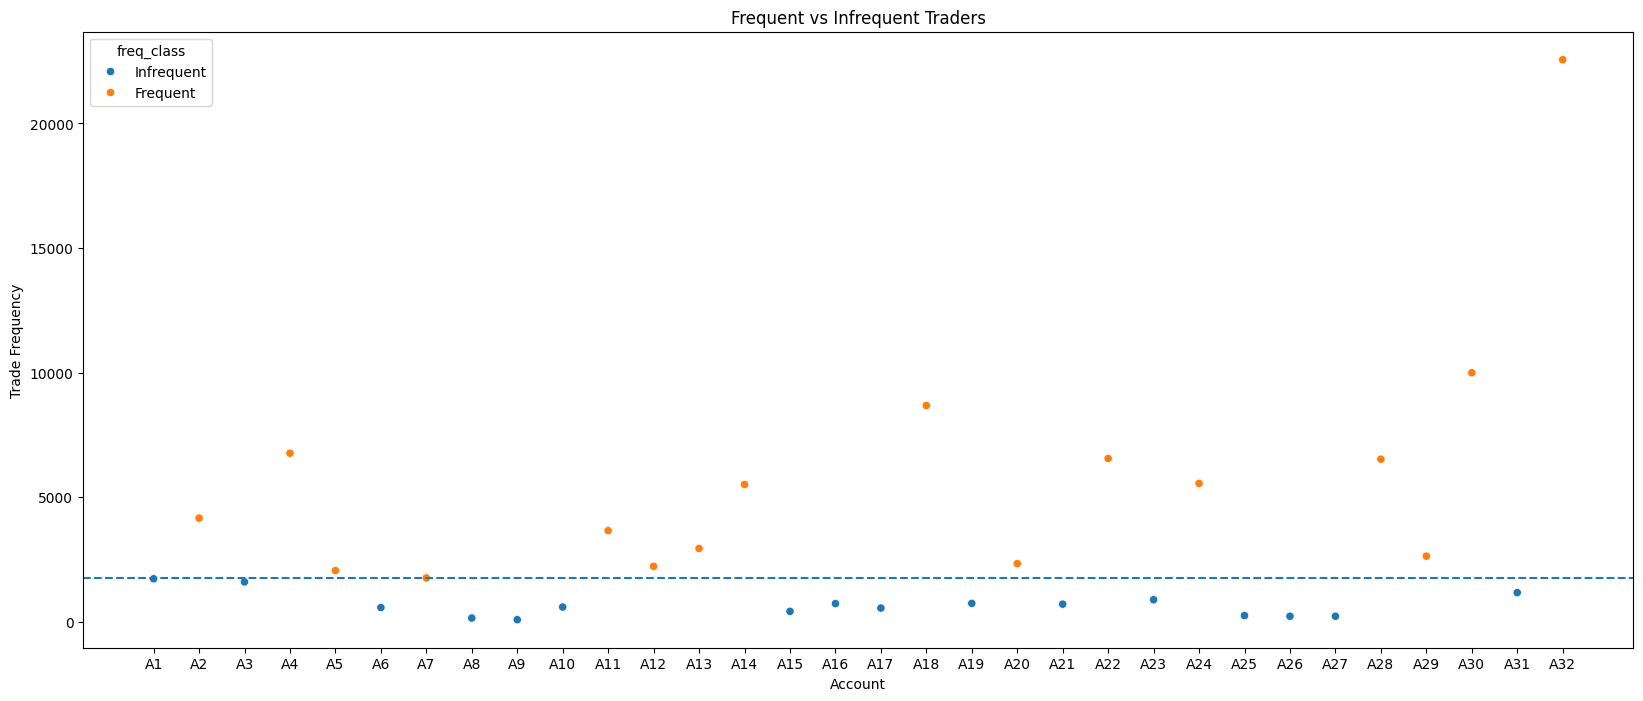

In [980]:
median_frequency = df_metric_per_account["trade_freq"].median()

df_metric_per_account["freq_class"] = np.where(
    df_metric_per_account["trade_freq"] >= median_frequency,
    "Frequent",
    "Infrequent"
)

plt.figure(figsize=(20, 8))

sns.scatterplot(
    data=df_metric_per_account,
    x="account_label",
    y="trade_freq",
    hue="freq_class"
)

plt.axhline(median_frequency, linestyle="--")

plt.xlabel("Account")
plt.ylabel("Trade Frequency")
plt.title("Frequent vs Infrequent Traders")

plt.show()

consistent winners vs inconsistent traders

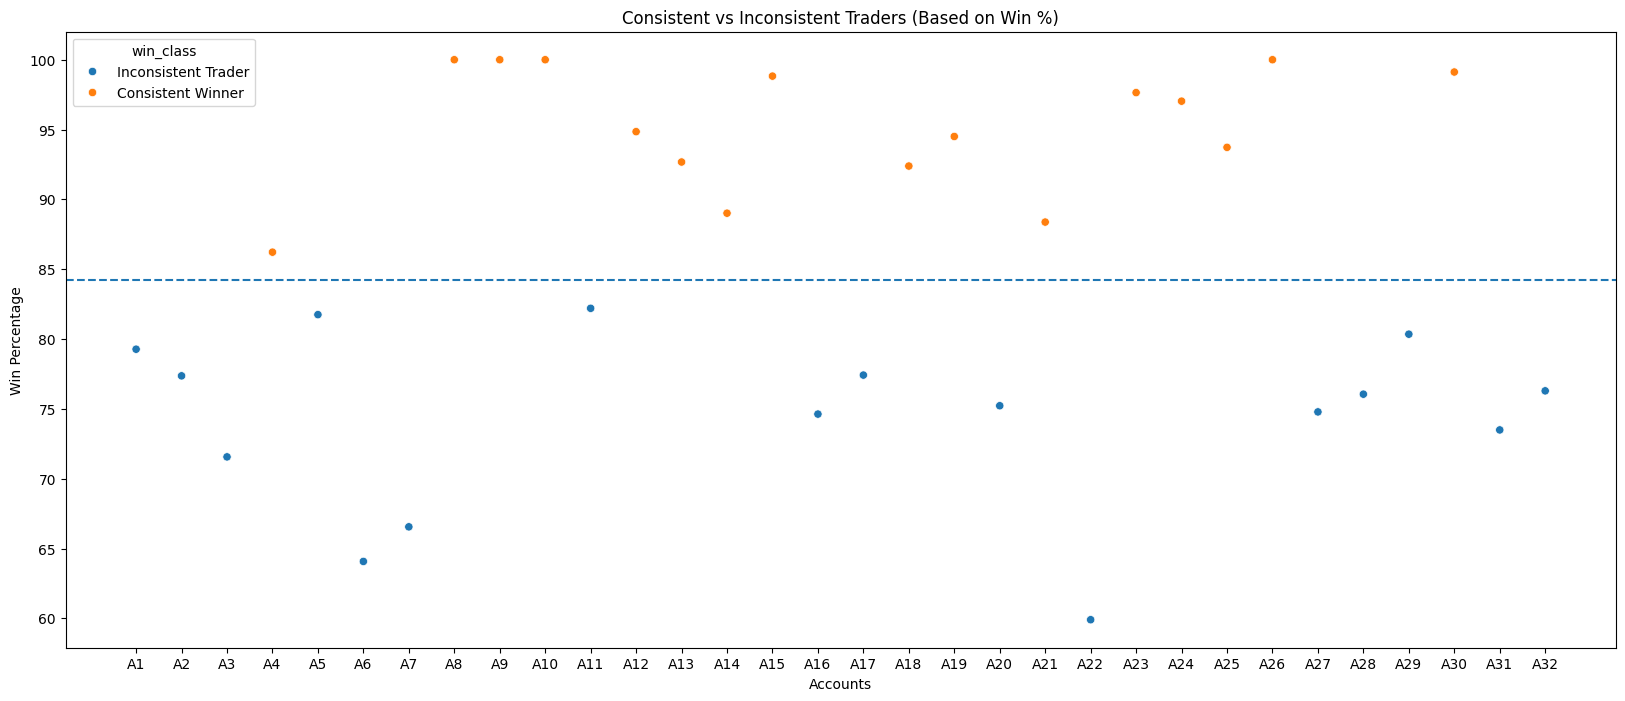

In [981]:
median_win = df_metric_per_account["win_pct"].median()

df_metric_per_account["win_class"] = np.where(
    df_metric_per_account["win_pct"] >= median_win,
    "Consistent Winner",
    "Inconsistent Trader"
)

plt.figure(figsize=(20, 8))

sns.scatterplot(
    data=df_metric_per_account,
    x="account_label",
    y="win_pct",
    hue="win_class"
)

plt.axhline(median_win, linestyle="--")

plt.xlabel("Accounts")
plt.ylabel("Win Percentage")
plt.title("Consistent vs Inconsistent Traders (Based on Win %)")

plt.show()

High vs Low Leverage Traders

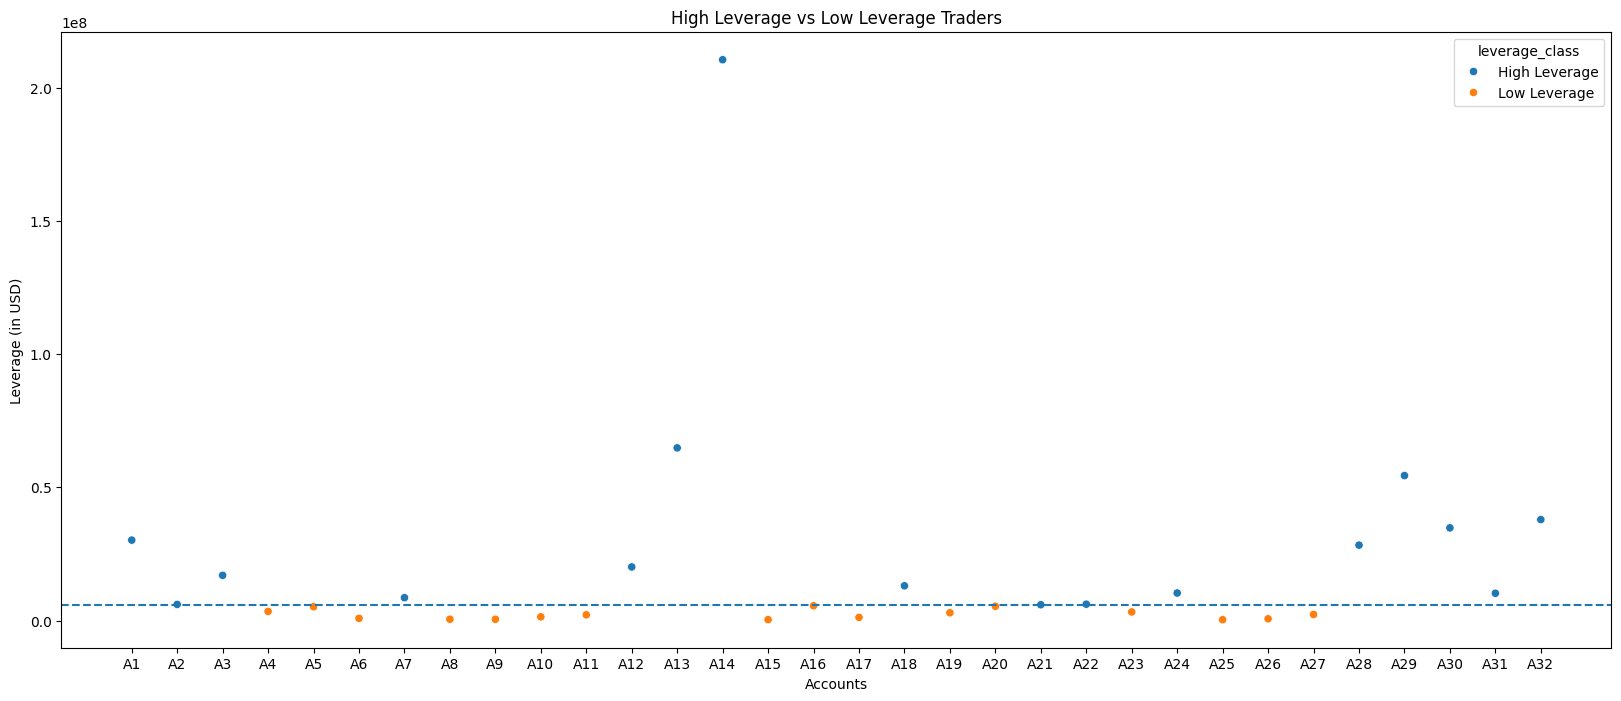

In [982]:
median_leverage = df_metric_per_account["leverage"].median()

df_metric_per_account["leverage_class"] = np.where(
    df_metric_per_account["leverage"] >= median_leverage,
    "High Leverage",
    "Low Leverage"
)

plt.figure(figsize=(20, 8))

sns.scatterplot(
    data=df_metric_per_account,
    x="account_label",
    y="leverage",
    hue="leverage_class"
)

plt.axhline(median_leverage, linestyle="--")

plt.xlabel("Accounts")
plt.ylabel("Leverage (in USD)")
plt.title("High Leverage vs Low Leverage Traders")

plt.show()

##### 4. Provide at least 3 insights backed by charts/tables

Insight 1: Does Win Rate Increase With Trading Frequency

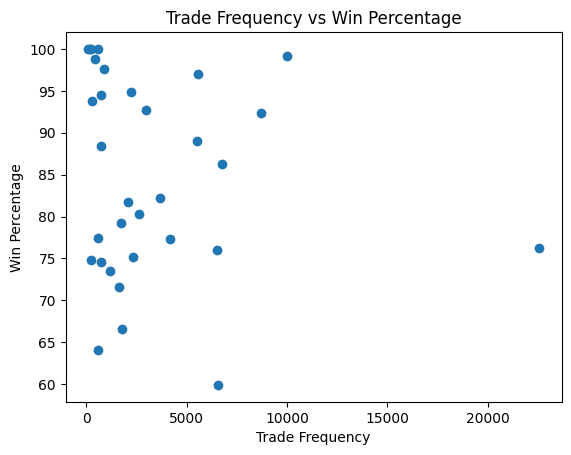

In [984]:
plt.figure()

plt.scatter(df_metric_per_account["trade_freq"], df_metric_per_account["win_pct"])

plt.xlabel("Trade Frequency")
plt.ylabel("Win Percentage")
plt.title("Trade Frequency vs Win Percentage")

plt.show()

There is no clear positive relationship between trade frequency and win percentage. Some high-frequency traders exhibit moderate win rates, while several lower-frequency traders achieve high win percentages. This suggests that increased trading activity does not necessarily translate into higher performance.

Insight 2: Presence of Extreme Win Rate Outliers (100%)

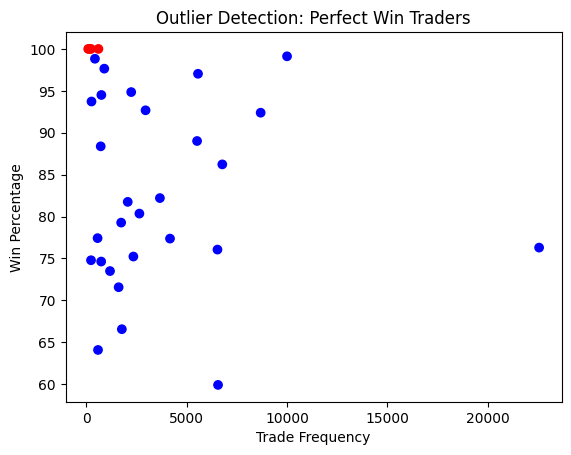

In [989]:
plt.figure()

colors = np.where(df_metric_per_account["win_pct"] == 100, "red", "blue")

plt.scatter(df_metric_per_account["trade_freq"], df_metric_per_account["win_pct"], c=colors)

plt.xlabel("Trade Frequency")
plt.ylabel("Win Percentage")
plt.title("Outlier Detection: Perfect Win Traders")

plt.show()

In [995]:
perfect_traders = df_metric_per_account[df_metric_per_account["win_pct"] == 100]

perfect_traders[["account_label", "win_pct", "trade_freq", "freq_class"]]

,account_label,win_pct,trade_freq,freq_class
account,,,,
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,A8,100.00,158,Infrequent
0x420ab45e0bd8863569a5efbb9c05d91f40624641,A9,100.00,90,Infrequent
0x430f09841d65beb3f27765503d0f850b8bce7713,A10,100.00,599,Infrequent
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,A26,100.00,230,Infrequent


A small number of accounts (13%) exhibit a 100% win rate. However, these accounts generally have low trade frequency, suggesting limited sample size rather than sustainable superior performance. This may indicate survivorship bias or short trading history.

Insight 3: Distribution of Win % for Frequent Traders

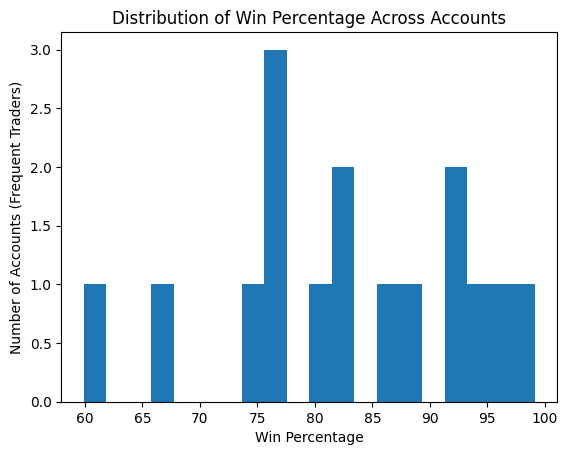

In [997]:
plt.figure()

frequent_traders = df_metric_per_account["freq_class"] == "Frequent"

plt.hist(df_metric_per_account.loc[frequent_traders ,["win_pct"]], bins=20)

plt.xlabel("Win Percentage")
plt.ylabel("Number of Accounts (Frequent Traders)")
plt.title("Distribution of Win Percentage Across Accounts")

plt.show()

Win percentages are clustered between 70%–90%, with a small number of extreme outliers. This indicates moderate consistency across most traders, with few exceptional performers.

Insight 4: Out of total positive profits, what % came from each sentiment?

In [1034]:
df_pnl = df_merged.groupby(["account", "market_sentiment"])["closed_pnl"].sum().unstack(fill_value=0)

In [1035]:
df_positive = df_pnl.clip(lower=0)

In [1036]:
df_pct = df_positive.div(df_positive.sum(axis=1), axis=0) * 100

In [1037]:
df_pct = df_pct[df_positive.sum(axis=1) > 0]

In [1039]:
df_pct.index = [f"A{i+1}" for i in range(len(df_pct))]

<Figure size 640x480 with 0 Axes>

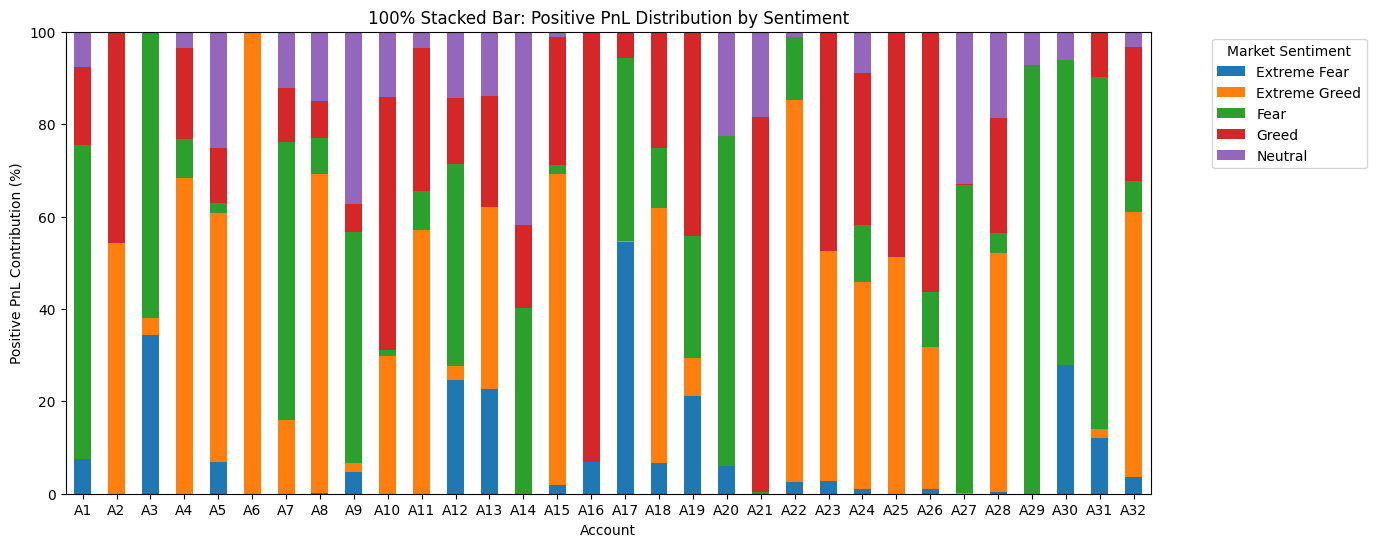

In [1040]:
import matplotlib.pyplot as plt

plt.figure()

df_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(14,6)
)

plt.xlabel("Account")
plt.ylabel("Positive PnL Contribution (%)")
plt.title("100% Stacked Bar: Positive PnL Distribution by Sentiment")

plt.xticks(rotation=0)
plt.legend(title="Market Sentiment", bbox_to_anchor=(1.05, 1))

plt.show()



A large portion of profits across traders occurs during bullish sentiment regimes (Greed/Extreme Greed).
- You can visually see a lot of Orange (Extreme Greed) and Red (Greed) across many accounts.


Extreme Fear Is Rarely a Major Profit Driver
- Blue (Extreme Fear) appears:
- Small for most traders
- Dominant for very few


Some Traders Are Highly Specialized
- A few accounts have nearly 100% profit from one sentiment.
- This indicates strategy specialization rather than diversification.

### Part C — “Actionable output”


Propose **2 strategy ideas** or “rules of thumb” based on your findings.

Example: “During Fear days, reduce leverage for segment X; increase trade frequency only for segment Y.”

#### Strategy Idea 1: Control Overtrading Risk

- There is no strong positive relationship between trade frequency and win %.
- High-frequency traders are not consistently outperforming.
- Cap trade frequency for accounts whose win rate falls below the group median.

If win_pct < median_win and trade_freq > median_trade_freq

Then: 
- Reduce trade size by 20–30%
- Or limit max daily trades

Since higher trading frequency does not consistently improve win rates, a risk-control mechanism should be implemented. Accounts with below-median win rates and above-median trading frequency should reduce activity or position sizing to prevent performance deterioration due to overtrading.

#### Strategy Idea 2: Increase Allocation in Bullish Regimes

Rule of Thumb:
When market sentiment is Greed or Extreme Greed, increase exposure to traders since most profits historically occur in these regimes.

Why?

Chart shows:
- A large portion of positive PnL comes from Greed phases.
- Traders perform better in bullish conditions.

Simple Action:
- Increase position size by 10–20% during Greed periods.
- Keep normal or reduced allocation during Fear periods.

#### Strategy Idea 3: Reduce Risk During Fear Regimes

Rule of Thumb:
During Fear or Extreme Fear, reduce leverage or trading size since fewer traders generate profits in these conditions.

Why?

Your chart shows:
- Fear contributes less to profits for most accounts.
- Traders are less effective during panic markets.

Simple Action:
- Cut position size by 20–30% during Fear.
- Avoid aggressive trading in high-volatility conditions.